In [46]:
import numpy as np
from utils import read_raw, read_rgb, read_data, read_envi_ascii
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from machine_learning import DecisionTree, svm_classifier, RandomForest, AdaBoost, GradientBoosting, XGBoost, MLP, predict

In [47]:
data = read_envi_ascii('data/biaotu.txt')
huangqi = data['huangqi'][:,:40]
zazhi1 = data['zazhi1'][:,:40]
zazhi2 = data['zazhi2'][:,:40]
beijing = data['beijing'][:,:40]
gancaopian = data['gancaopian'][:,:40]
hongqi = data['hongqi'][:,:40]
huangqi_y = np.ones(huangqi.shape[0]) * 3
zazhi1_y = np.ones(zazhi1.shape[0]) * 1
zazhi2_y = np.ones(zazhi2.shape[0]) * 2
beijing_y = np.ones(beijing.shape[0]) * 0
gancaopian_y = np.ones(gancaopian.shape[0]) * 4
hongqi_y = np.ones(hongqi.shape[0]) * 5

In [48]:
data_x = np.concatenate((huangqi, zazhi1, zazhi2, gancaopian), axis=0)
data_y = np.concatenate((huangqi_y, zazhi1_y, zazhi2_y, gancaopian_y), axis=0)

In [49]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data_x ,data_y, test_size=0.3, stratify=data_y)

In [50]:
file_name = 'models/dt.p'
DecisionTree(train_x, train_y,test_x, test_y, file_name)

预测时间： 0.0
DT训练模型评分：1.0
DT待测模型评分：0.8780864197530864
DT预测结果：[1. 4. 4. 2. 1. 3. 1. 1. 3. 3. 1. 2. 1. 1. 4. 2. 1. 2. 4. 3. 2. 3. 1. 1.
 2. 1. 2. 2. 3. 3. 3. 2. 3. 3. 1. 2. 4. 2. 1. 1. 2. 3. 3. 3. 2. 4. 3. 2.
 4. 2. 4. 2. 4. 2. 2. 1. 2. 1. 4. 2. 3. 1. 2. 1. 3. 3. 1. 3. 3. 4. 2. 2.
 3. 3. 2. 4. 4. 1. 1. 1. 4. 3. 4. 4. 3. 4. 2. 2. 1. 4. 4. 4. 2. 3. 4. 4.
 1. 3. 1. 1. 3. 1. 2. 2. 3. 3. 1. 4. 2. 2. 3. 4. 1. 3. 2. 3. 2. 4. 3. 4.
 1. 3. 2. 3. 2. 2. 4. 3. 2. 4. 2. 1. 1. 2. 1. 2. 2. 3. 2. 3. 1. 4. 1. 1.
 1. 4. 3. 3. 4. 4. 3. 1. 1. 4. 3. 3. 1. 2. 4. 2. 3. 1. 3. 3. 2. 3. 2. 2.
 3. 1. 1. 2. 4. 2. 2. 4. 1. 3. 4. 2. 4. 3. 1. 4. 3. 1. 1. 3. 1. 2. 4. 3.
 1. 1. 1. 2. 1. 1. 3. 4. 4. 1. 4. 3. 3. 4. 2. 2. 2. 1. 3. 4. 4. 4. 2. 1.
 1. 3. 2. 4. 3. 3. 3. 2. 2. 2. 1. 4. 3. 3. 3. 3. 3. 4. 4. 3. 4. 1. 3. 4.
 4. 1. 3. 2. 4. 2. 4. 2. 1. 1. 2. 1. 2. 2. 4. 1. 1. 1. 4. 1. 4. 1. 2. 3.
 1. 1. 1. 4. 4. 2. 2. 4. 4. 2. 4. 3. 2. 2. 1. 2. 3. 4. 4. 4. 1. 4. 3. 3.
 1. 1. 2. 4. 2. 3. 3. 2. 4. 3. 1. 2. 4. 1. 3. 4. 1. 2. 3. 3. 2. 3.

In [51]:
max_value = np.max(beijing, axis=0)
min_value = np.min(beijing, axis=0)

In [52]:
bands = np.arange(0, 40)
data = read_raw('data/hebing.raw', shape=(692, 272, 768), setect_bands=bands)

In [53]:
# 建立一个和data一样长和款大小的全1矩阵
data_o = np.ones((data.shape[0], data.shape[1]))

In [54]:
# 将data中满足条件的位置赋值为0， 条件为data中的[:, :, 2] 小于 0.15，大于0.015，且data中的[:, :, 8] 小于0.15，大于0.02
data_o[(data[:, :, 2] < 0.15) & (data[:, :, 2] > 0.015) & (data[:, :, 8] < 0.15) & (data[:, :, 8] > 0.02)] = 0

In [55]:
# 将data_o中的值为1的位置的data按顺序取出
data_x = data[data_o == 1]

In [56]:
data_y = predict(data_x, 'models/dt.p')

预测时间： 0.022939205169677734


In [57]:
# 将data_y按顺序填到data_o中值为1的位置
data_o[data_o == 1] = data_y

In [58]:
data_o = data_o.reshape((data.shape[0], data.shape[1]))

In [59]:
import cv2
from scipy.ndimage import binary_dilation

pre_pic = data_o.copy()

# pre_pic_colored[data_o == 0] = [0, 0, 0]
# pre_pic_colored[data_o == 1] = [255, 0, 0]
# pre_pic_colored[data_o == 2] = [0, 255, 0]
# pre_pic_colored[data_o == 3] = [0, 0, 255]
# pre_pic_colored[data_o == 4] = [255, 255, 0]
# pre_pic_colored[data_o == 5] = [255, 0, 255]

mask_3 = pre_pic == 3
structure_element = np.ones((3, 3), dtype=np.uint8)
pre_pic[binary_dilation(mask_3, structure=structure_element, iterations=1)] = 3

mask_4 = pre_pic == 4
pre_pic[binary_dilation(mask_4, structure=structure_element, iterations=1)] = 4

blk_size = 4
# 将pre_pic分块
pre_pic_block = []

for i in range(0, pre_pic.shape[0], blk_size):
    for j in range(0, pre_pic.shape[1], blk_size):
        pre_pic_block.append(pre_pic[i:i+blk_size, j:j+blk_size])
# 每一块按照块中出现最多的类别赋值
pre_pic_block = np.array(pre_pic_block).astype(np.uint8)
pre_pic_block = pre_pic_block.reshape(-1, blk_size*blk_size)
pre_pic_block = np.array([np.argmax(np.bincount(i)) for i in pre_pic_block])
pre_pic_block = pre_pic_block.reshape(pre_pic.shape[0]//blk_size, pre_pic.shape[1]//blk_size)





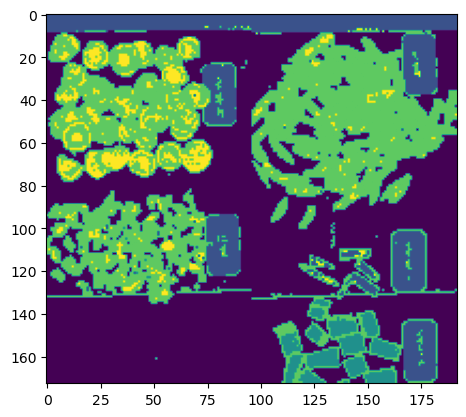

In [60]:
plt.imshow(pre_pic_block)
plt.savefig('1.png')